In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sign_mnist_train.csv')
tst = pd.read_csv('sign_mnist_test.csv')

In [3]:
X_train = df.drop('label', axis=1)
y_train = df['label']

X_test = tst.drop('label', axis=1)
y_test = tst['label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_test)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

pca.fit(X_train)

train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

X_train = train_img
X_test = test_img

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

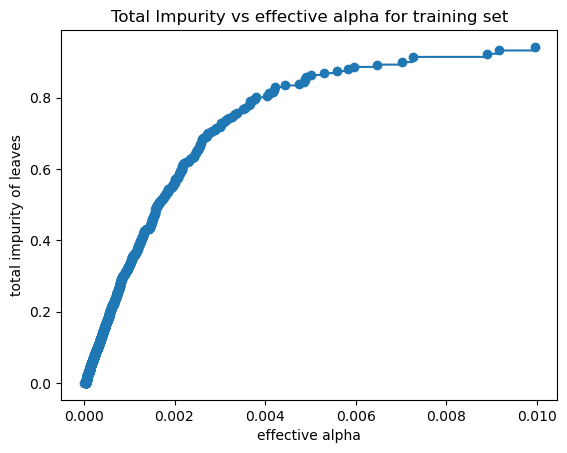

In [5]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [6]:
ccp_alphas = ccp_alphas[::50]
impurities = impurities[::50]

In [7]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=123, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

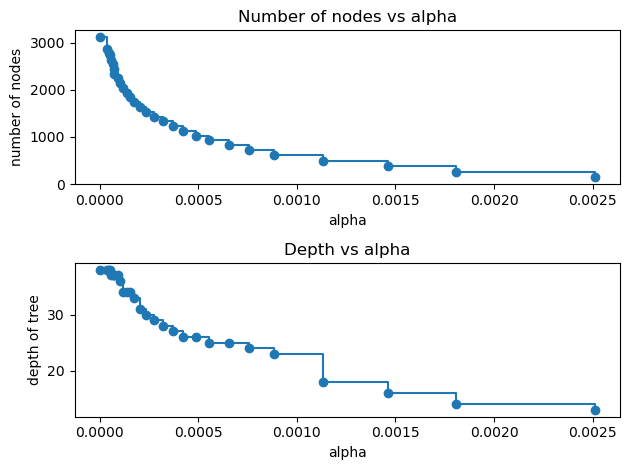

In [8]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

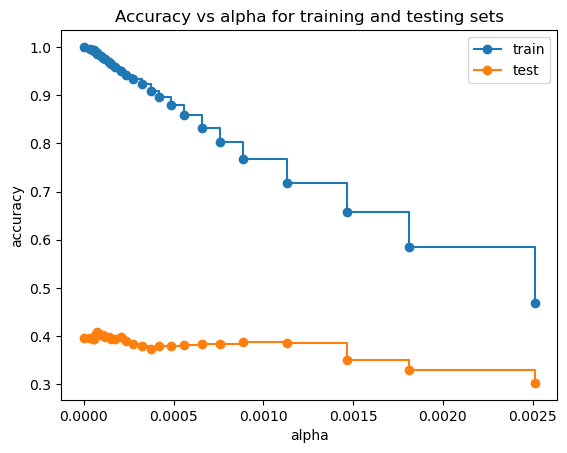

In [9]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [16]:
optimal_alpha = 0.001

In [17]:
clf = DecisionTreeClassifier(random_state=123, ccp_alpha=optimal_alpha)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=123)

In [27]:
%%time
X_train = df.drop('label', axis=1)
y_train = df['label']

X_test = tst.drop('label', axis=1)
y_test = tst['label']




from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=123, ccp_alpha=optimal_alpha, max_depth=10)
clf.fit(X_train, y_train)
#scores = cross_val_score(clf, X_train, y_train, cv=10)
#scores.mean()
clf.score(X_test, y_test)

Wall time: 9.63 s


0.31650864472950363

In [19]:
clf.score(X_test, y_test)

0.3424428332403793

In [20]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.3962632459564975

PCA:

In [21]:
len(df.iloc[0]) - len(train_img[0])  - 1

671

In [22]:
len(train_img[0])

113